In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-longevity-factors/LiveLongerData.csv


# **** Data Loading

In [65]:
df=pd.read_csv('/kaggle/input/life-longevity-factors/LiveLongerData.csv')
df.head(10)

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,Smoking,-10.0,strong,3,Both,negative,10 years gained (against those who continue to...,14 if combined with exercise and eating health...,1,"Khaw KT, et al. (2008). Combined impact of hea...",http://www.washingtonpost.com/wp-dyn/articles/...
1,Sitting Down,-3.0,suggestive,1,Both,negative,for 8-11 hours sitting a day,"No matter how much you exercise, sitting too m...",2,Sydney School of Public Health research paper ...,http://www.ncbi.nlm.nih.gov/pubmed/22450936
2,Too much sleeping,-1.5,suggestive,1,Both,negative,"7 hours ideal, no more than 8 hrs a night",Averaging more than 8 hours sleep a night will...,3,New Scientist,http://www.newscientist.com/article/dn1928-sev...
3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
4,More Pets,3.0,good,2,Both,positive,particularly for elderly. calc assumes that he...,(1) Cats - According to a study by the Minneso...,5,Medical News Today; National Center for Biotec...,http://www.medicalnewstoday.com/articles/98432...
5,more professional responsibility,3.5,suggestive,1,Male,positive,higher and managerial professionals live longe...,"At age 65, LE of males (2002-06) classified by...",6,Longevity Science Advisory Panel,http://www.longevitypanel.co.uk/docs/life-expe...
6,Healthy Eating,7.0,strong,3,Both,positive,Japanese / Mediterannean diet will lengthen li...,Figure given for Mediterannean diet. JAPANESE:...,7,Amazon (book) The Okinawa Program : How the Wo...,http://www.amazon.com/Okinawa-Program-Longest-...
7,Red Meat,-1.0,good,2,Both,positive,NaN,risk of dying in a given year increases by 13%...,8,BBC News,http://www.bbc.co.uk/news/magazine-17389938
8,Alcohol (heavy abuse),-11.0,good,2,Both,positive,a lot is bad,Alcoholism reduces life expectancy by about 10...,9,New York Times,http://health.nytimes.com/health/guides/diseas...
9,City living,-2.5,suggestive,1,Both,positive,or living near a busy road,According to a Canada’s McMaster University st...,10,2004 study by Murray Finkelstein @ Canada McMa...,http://aje.oxfordjournals.org/content/160/2/17...


In [66]:
df.describe()

,Years gained / lost,strength of science as a number,ID
count,35.000000,35.000000,35.000000
mean,3.243143,1.771429,18.000000
std,8.126155,0.877353,10.246951
min,-25.000000,1.000000,1.000000
25%,1.070000,1.000000,9.500000
50%,3.500000,1.000000,18.000000
75%,7.750000,3.000000,26.500000
max,15.000000,3.000000,35.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Factor                           35 non-null     object 
 1   Years gained / lost              35 non-null     float64
 2   strength of science?             35 non-null     object 
 3   strength of science as a number  35 non-null     int64  
 4   sexes affected                   35 non-null     object 
 5   effect                           35 non-null     object 
 6   Comment                          26 non-null     object 
 7   Note                             35 non-null     object 
 8   ID                               35 non-null     int64  
 9   Sources                          35 non-null     object 
 10  Links                            35 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.1+ KB


# **** Data Manipulation

In [68]:
'''df['Factor'] = df['Factor'].astype('category')
df['strength of science?'] = df['strength of science?'].astype('category')
df['strength of science as a number'] = df['strength of science as a number'].astype('category')
df['sexes affected'] = df['sexes affected'].astype('category')
df['effect'] = df['effect'].astype('category')
df['Sources'] = df['Sources'].astype('category')'''


"df['Factor'] = df['Factor'].astype('category')\ndf['strength of science?'] = df['strength of science?'].astype('category')\ndf['strength of science as a number'] = df['strength of science as a number'].astype('category')\ndf['sexes affected'] = df['sexes affected'].astype('category')\ndf['effect'] = df['effect'].astype('category')\ndf['Sources'] = df['Sources'].astype('category')"

In [69]:
df['ID'] = df['ID'].astype(str)


In [70]:
corel = df.corr()
corel

,Years gained / lost,strength of science as a number
Years gained / lost,1.000000,-0.374685
strength of science as a number,-0.374685,1.000000


# **** Exploratory Data Analysis

# Correlation heatmap for numeric columns

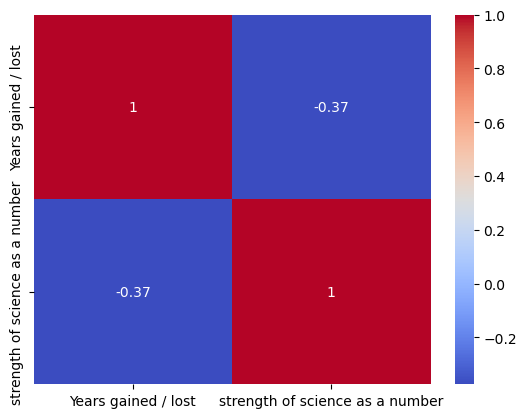

In [71]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Pairwise scatter plot for numeric columns

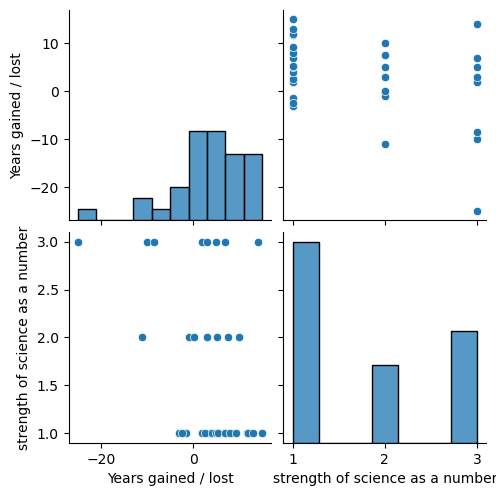

In [72]:
sns.pairplot(data=df[['Years gained / lost', 'strength of science as a number', 'ID']])
plt.show()

# 'Factor' column (Categorical)

Smoking                                                       1
More Money                                                    1
Avoid Cancer                                                  1
More Exercise                                                 1
A little alcohol                                              1
More conscientious & stable                                   1
Orgasms                                                       1
A little wine                                                 1
being a woman                                                 1
a lifestyle of non-smoking, exercising, and healthy eating    1
More close Friends                                            1
Greater Faith (churchgoing)                                   1
Country living                                                1
Polygamy                                                      1
Good genetics                                                 1
A little exercise                       

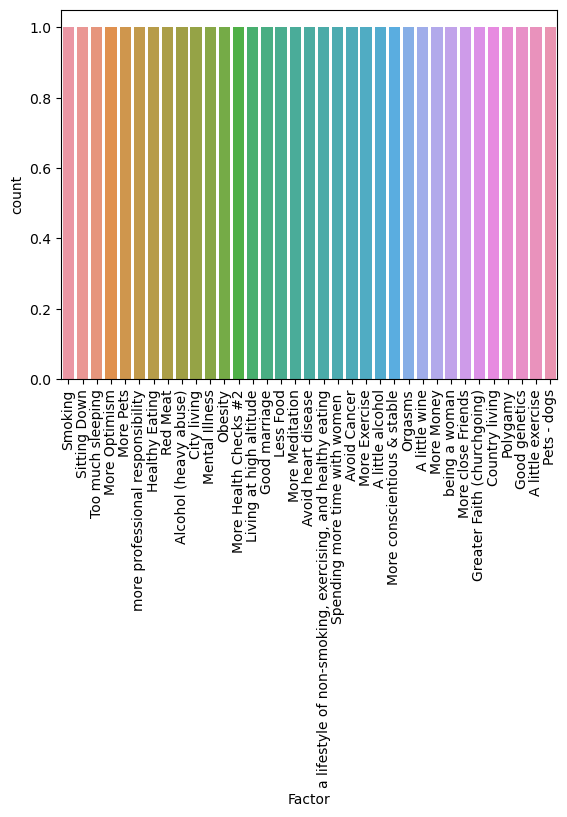

In [73]:
print(df['Factor'].value_counts())
sns.countplot(data=df, x='Factor')
plt.xticks(rotation=90)
plt.show()

# 'Years gained / lost' column (Numeric)

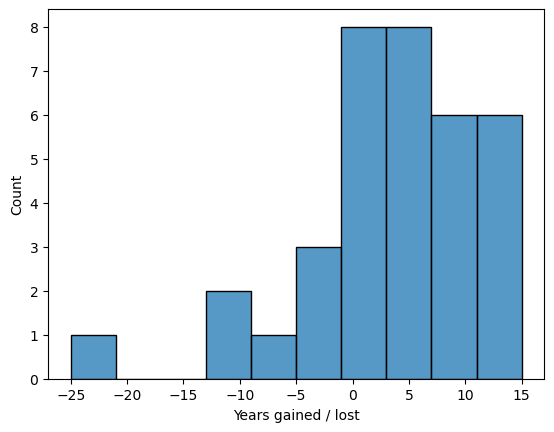

In [74]:
sns.histplot(data=df, x='Years gained / lost', bins=10)
plt.show()

# 'strength of science?' column (Categorical)


suggestive    18
strong        10
good           7
Name: strength of science?, dtype: int64


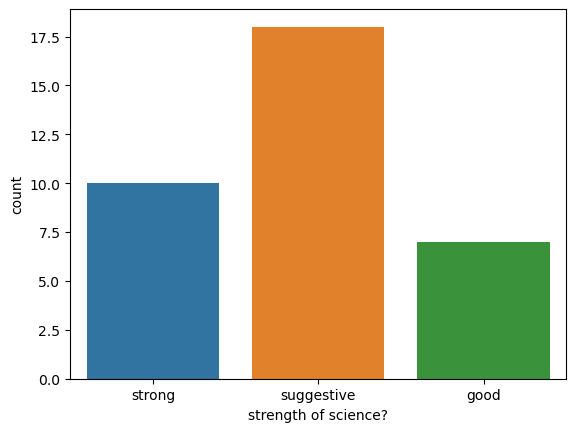

In [75]:
print(df['strength of science?'].value_counts())
sns.countplot(data=df, x='strength of science?')
plt.show()

# 'strength of science as a number' column (Categorical)


1    18
3    10
2     7
Name: strength of science as a number, dtype: int64


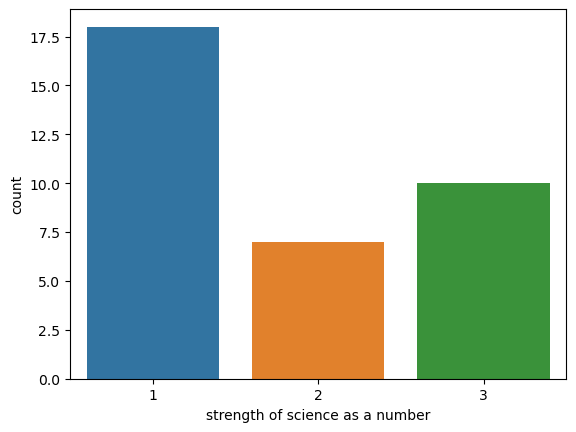

In [76]:
print(df['strength of science as a number'].value_counts())
sns.countplot(data=df, x='strength of science as a number')
plt.show()

#  'sexes affected' column (Categorical)

Both                             25
Male                              5
Female                            2
Both, but esp. for men            1
male                              1
Both but especially for women     1
Name: sexes affected, dtype: int64


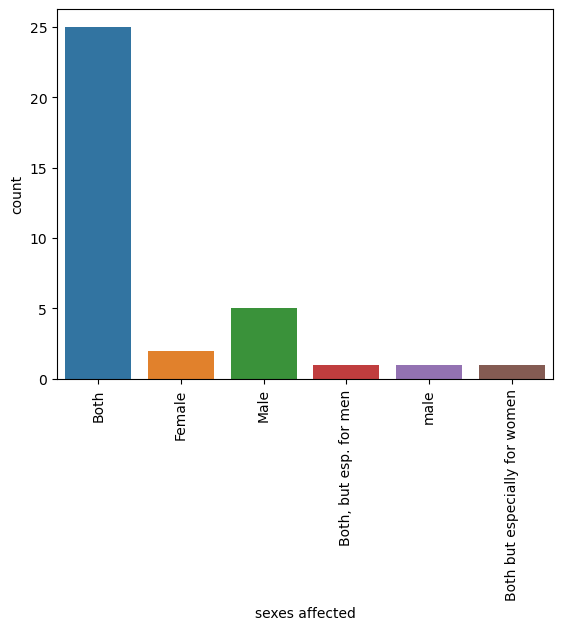

In [77]:
print(df['sexes affected'].value_counts())
sns.countplot(data=df, x='sexes affected')
plt.xticks(rotation=90)
plt.show()

# EDA for 'effect' column (Categorical)

positive    31
negative     4
Name: effect, dtype: int64


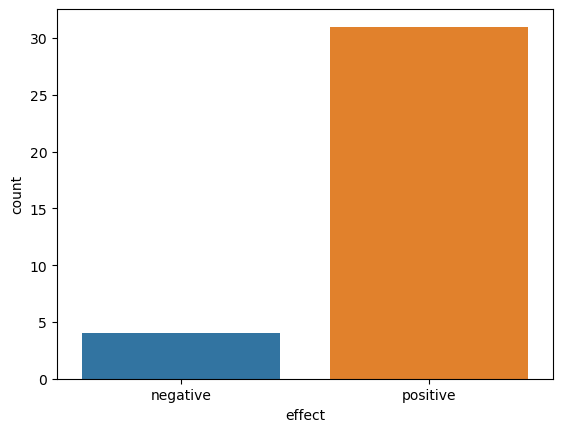

In [78]:
print(df['effect'].value_counts())
sns.countplot(data=df, x='effect')
plt.show()

# 'Sources' column (Categorical)


Centres for Disease Control & Prevention                                                                                                                                                                                                       3
Khaw KT, et al. (2008). Combined impact of health behaviours and mortality in men and women: the EPIC Norfolk prospective population study. PLoS Medicine 5(1), 39–47.                                                                         2
New Scientist                                                                                                                                                                                                                                  2
2004 study by Murray Finkelstein @ Canada McMaster University                                                                                                                                                                                  2
Guardian; Wikipedia (units)         

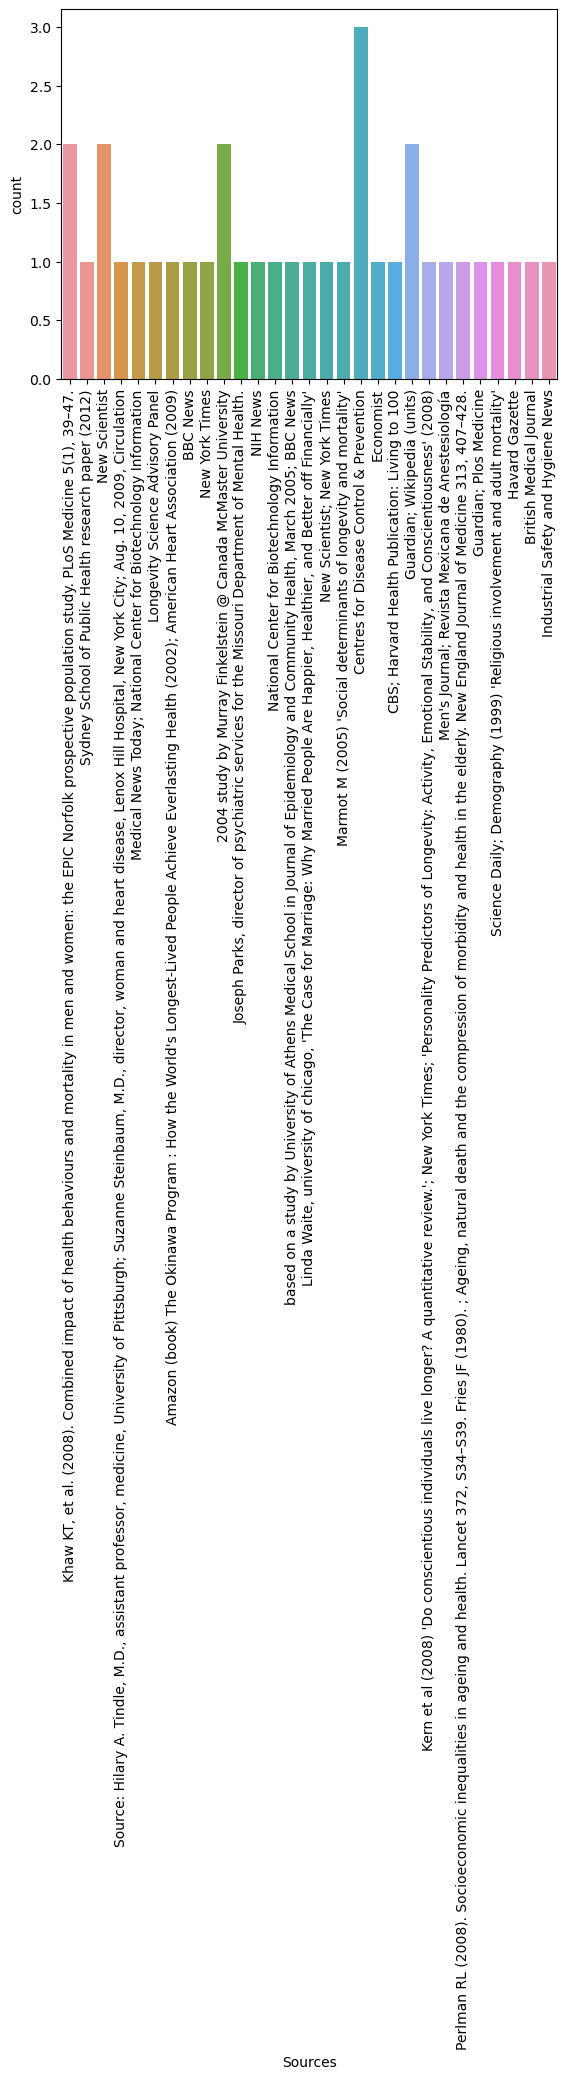

In [79]:
print(df['Sources'].value_counts())
sns.countplot(data=df, x='Sources')
plt.xticks(rotation=90)
plt.show()

# 'Comment' column (Textual)

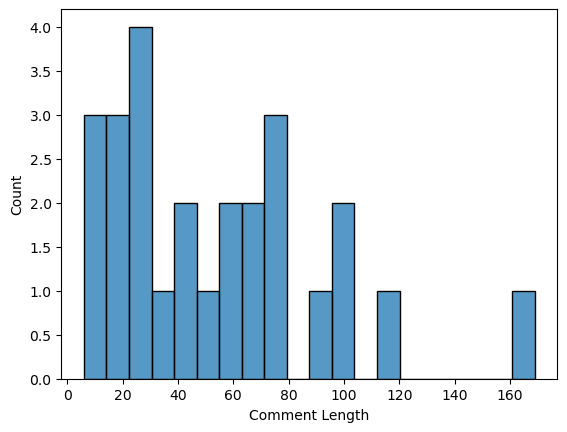

In [80]:
# length distribution of comments
df['Comment_length'] = df['Comment'].str.len()
sns.histplot(data=df, x='Comment_length', bins=20)
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

# 'Sources' vs 'Years gained / lost'


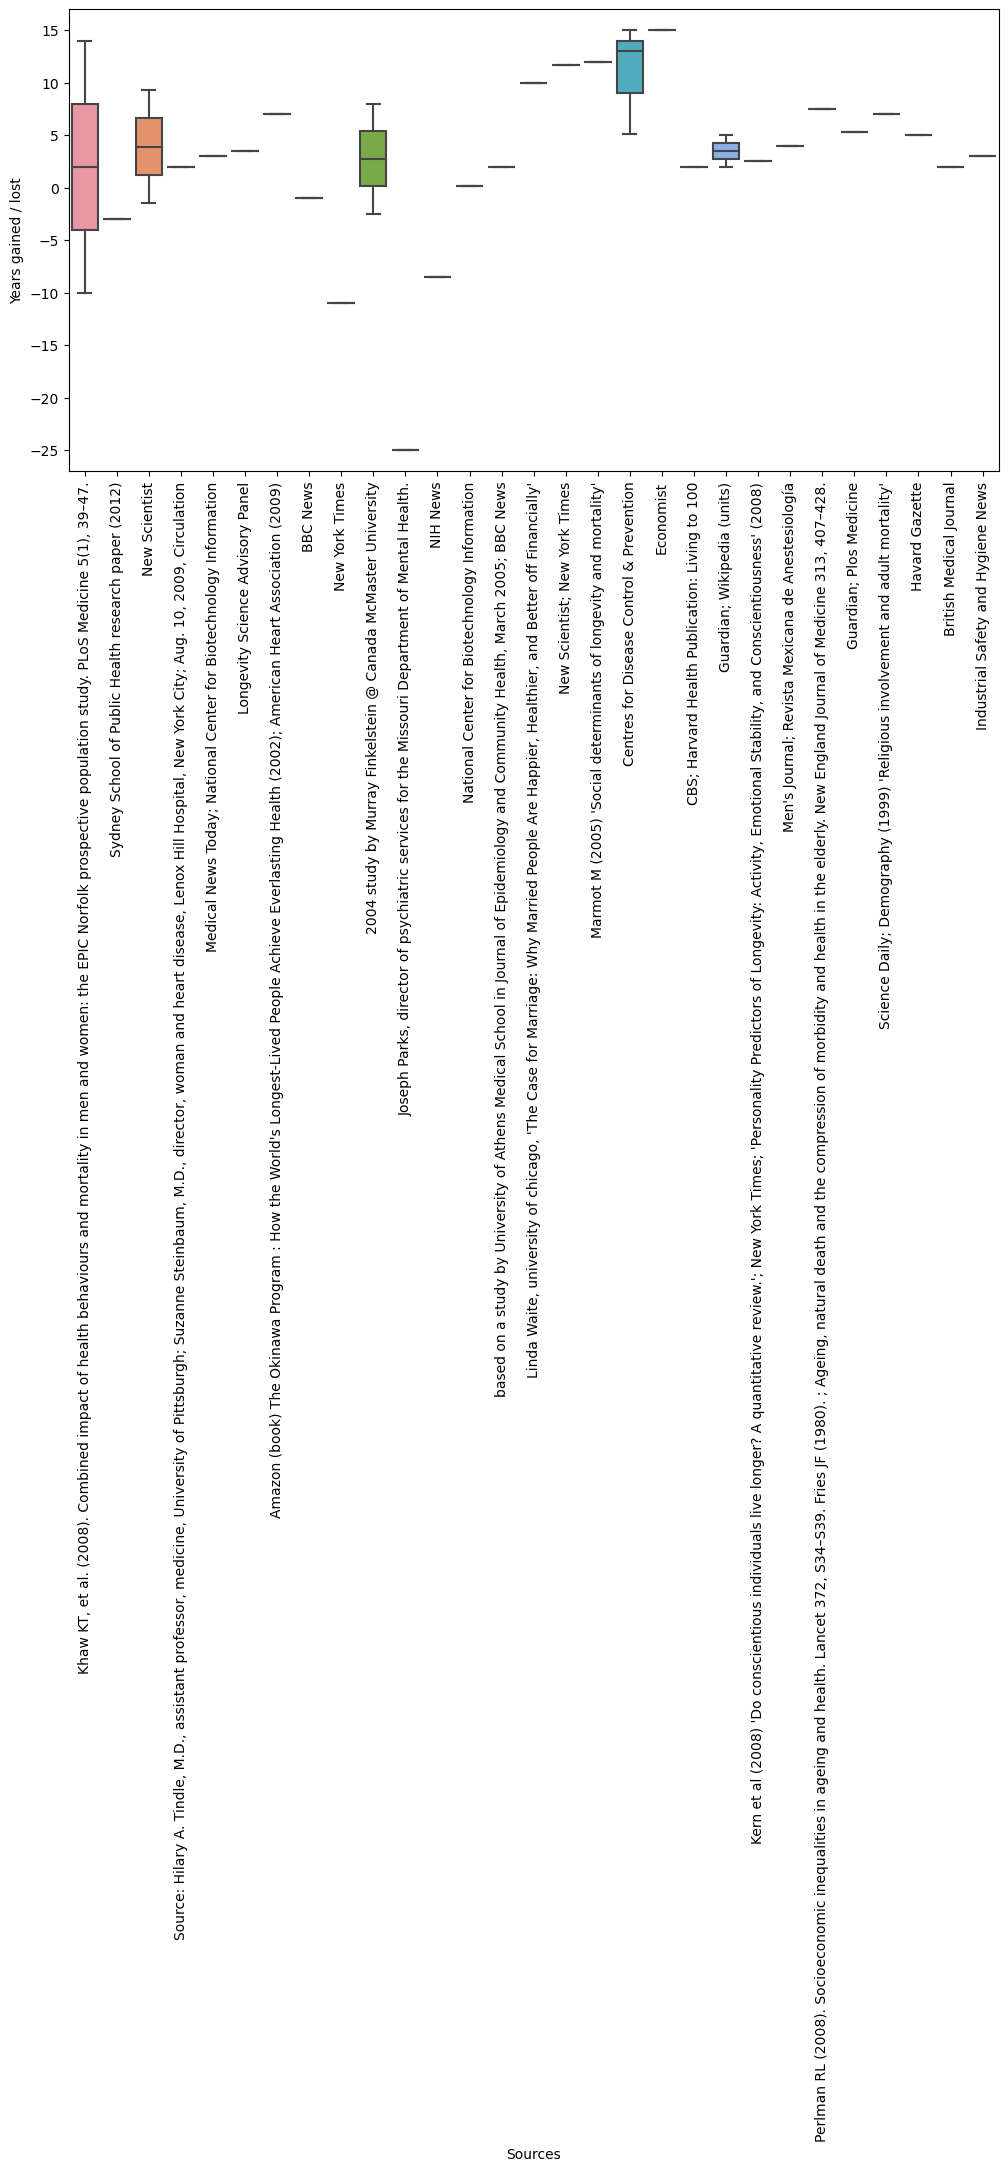

In [81]:
# Box plot to visualize the distribution of years gained/lost per source
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sources', y='Years gained / lost')
plt.xticks(rotation=90)
plt.xlabel('Sources')
plt.ylabel('Years gained / lost')
plt.show()

# 'sexes affected' vs 'effect'


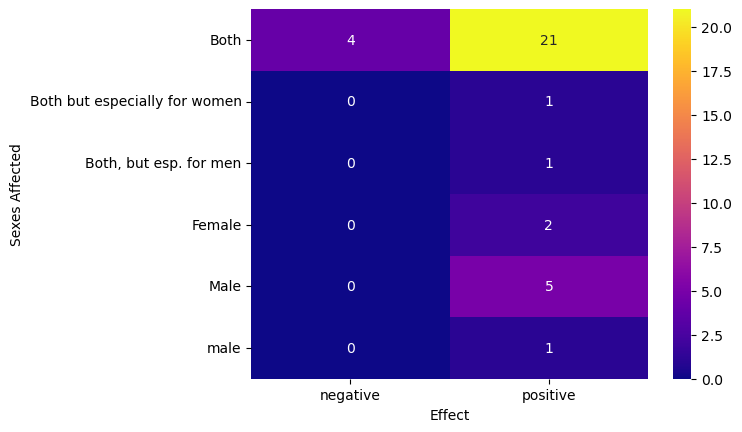

In [82]:
sex_effect_cross_tab = pd.crosstab(df['sexes affected'], df['effect'])
sns.heatmap(sex_effect_cross_tab, annot=True, cmap='plasma')
plt.xlabel('Effect')
plt.ylabel('Sexes Affected')
plt.show()

# 'Years gained / lost' column (Numeric)


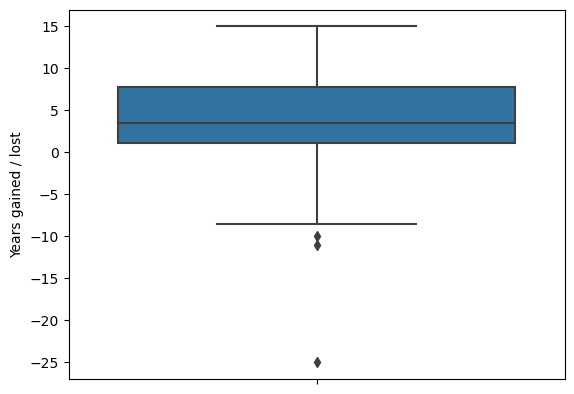

In [83]:
# Box plot to visualize the distribution and identify outliers
sns.boxplot(data=df, y='Years gained / lost')
plt.ylabel('Years gained / lost')
plt.show()

In [84]:
duplicate_ids = df[df.duplicated(subset=['ID'])]
print("Duplicate IDs:")
print(duplicate_ids)

Duplicate IDs:
Empty DataFrame
Columns: [Factor, Years gained / lost, strength of science?, strength of science as a number, sexes affected, effect, Comment, Note, ID, Sources, Links, Comment_length]
Index: []
